# [Комбинирование моделей](https://en.wikipedia.org/wiki/Ensemble_learning)

### Основные используемые методы

1. Bagging (Random Forest)
2. Boosting
3. Voting
4. Cascade

### [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating) / [Random Forest](https://en.wikipedia.org/wiki/Random_forest)

Вспоминаем прошлое занятие.

### [Boosting](https://en.wikipedia.org/wiki/Boosting_(machine_learning)

1. Каждой строке присваивается вес.
2. Строится классификатор на взвешенных данных.
3. Веса неверно классифицированных строк увеличиваются, верно - уменьшаются.
4. Строим новый классификатор на новых весах.
5. Повторяем 1-4 пока не достигнем предела.
6. Финальный результат - взвешенное среднее всех подмоделей.

![](https://sebastianraschka.com/images/faq/bagging-boosting-rf/boosting.png)

Примеры реализации:

1. [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost)
2. [Gradient Boosting](https://en.wikipedia.org/wiki/Gradient_boosting)

[“Competing in a data science contest without reading the data”](http://blog.mrtz.org/2015/03/09/competition.html)

![](images/1.png)

![](http://blog.mrtz.org/assets/staticvsint.jpg)


Для bagging и boosting обычно применяют однотипные модели, в отличии от следующих методов.

### Voting (голосование)

У нас есть несколько моделей, каждая из которых имеет свое предсказание. 
Результирующее предсказание - либо перевесом голосов ("жесткое голосование") 
либо по максимуму взвешенной суммы вероятностей ("мягкое голосование").


### Cascade / Blenders / Any other name :)

Основная идея - предсказания моделей как входные данные для следующей модели. 
Нейронная сеть как вырожденный случай. 

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [3]:
import imp

common_ds = imp.load_source('common_ds','../common_ds.py')

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 13)


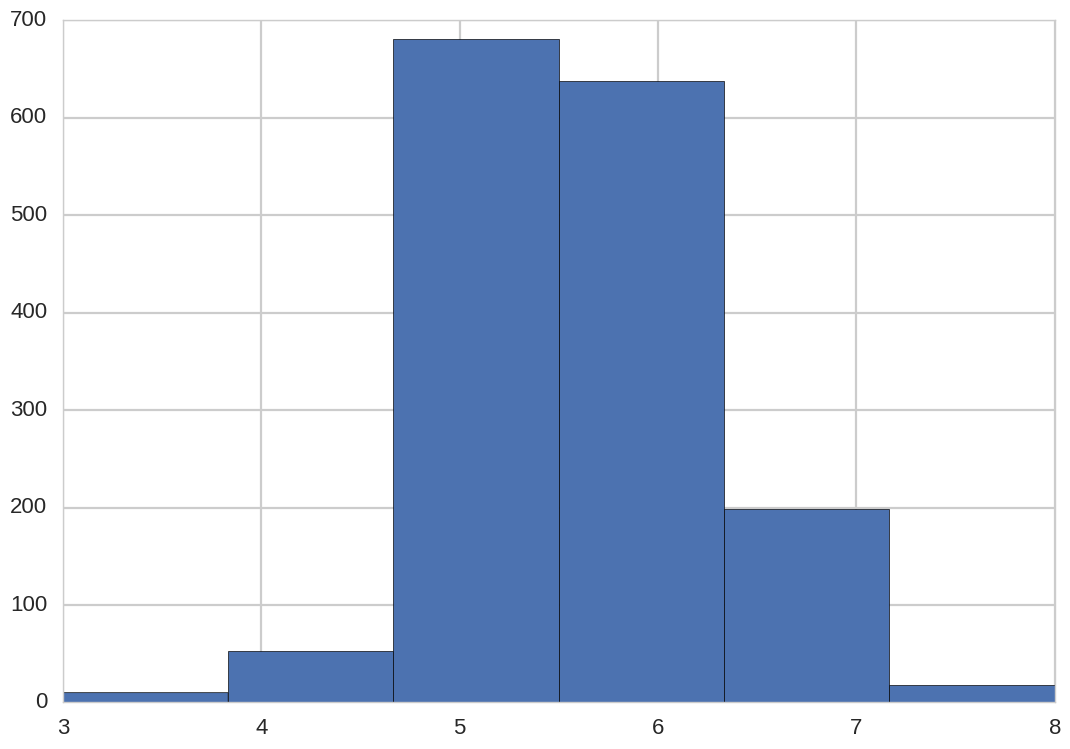

In [47]:
print df.shape

plt.hist(df.quality, bins=6);

In [6]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

In [48]:
Xnames = list(df.columns.values[1:11])
Xnames

['volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

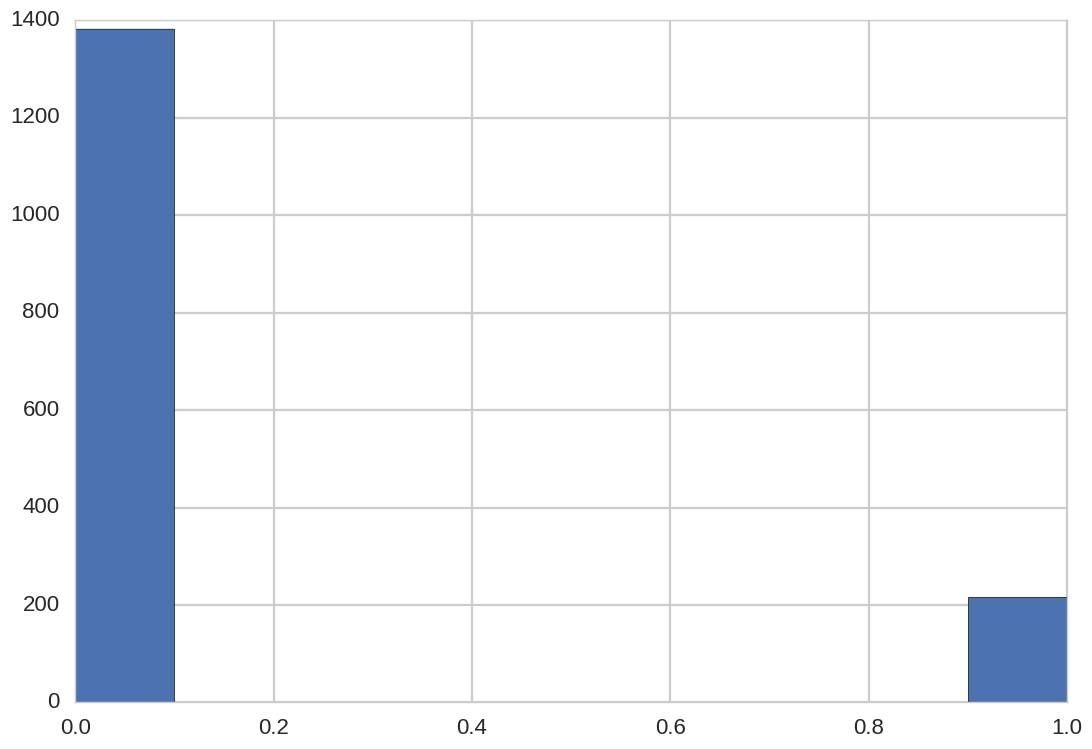

In [49]:
np.mean(df['target'])
df.target.hist()

In [9]:
from sklearn.model_selection import train_test_split
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [10]:
print "% Good wines in Training:", np.mean(df.target[mask])
print "% Good wines in Testing:", np.mean(df.target[~mask])

% Good wines in Training: 0.137643378519
% Good wines in Testing: 0.1328125


In [15]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": range(5, 10), 'min_samples_leaf': range(1, 10)}
clfTree1, Xtrain, ytrain, Xtest, ytest = common_ds.do_classify(clfTree1, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 7, 'min_samples_leaf': 2} 0.311739721155
############# based on standard predict ################
Accuracy on training data: 0.91
Accuracy on test data:     0.88
[[527  28]
 [ 51  34]]
########################################################


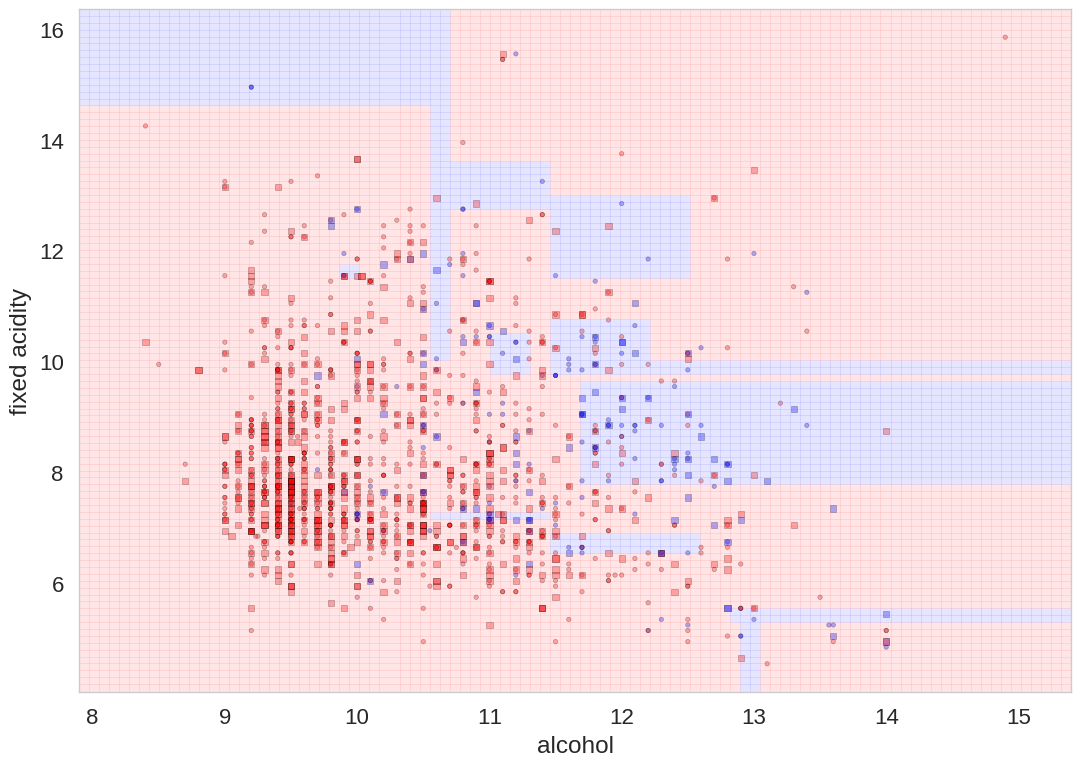

In [16]:
ax, _, _ = common_ds.points_plot(plt.gca(), Xtrain, Xtest, ytrain, ytest, clfTree1);
ax.set_xlabel('alcohol')
ax.set_ylabel('fixed acidity')

In [17]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = common_ds.do_classify(clfTree2, parameters, df, 
                                                     Xnames,'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')


using mask
BEST {'max_depth': 6, 'min_samples_leaf': 7} 0.444106403705
############# based on standard predict ################
Accuracy on training data: 0.93
Accuracy on test data:     0.88
[[529  26]
 [ 50  35]]
########################################################


In [18]:
from sklearn.tree import export_graphviz
export_graphviz(clfTree2, feature_names=Xnames)

In [19]:
!dot -Tpng tree.dot -o tree_example.png

![](tree_example.png)

In [20]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = common_ds.do_classify(clfForest, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'n_estimators': 7} 0.444047517701
############# based on standard predict ################
Accuracy on training data: 0.99
Accuracy on test data:     0.90
[[534  21]
 [ 45  40]]
########################################################


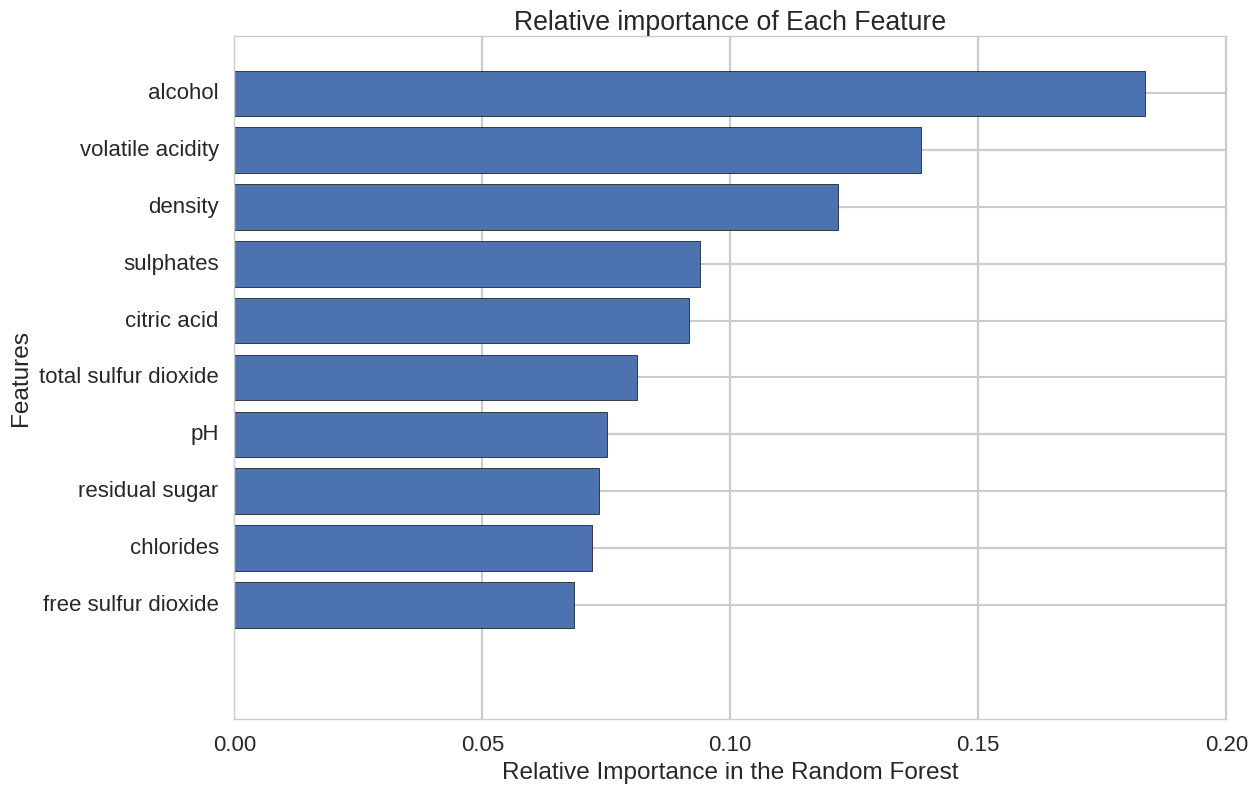

In [22]:
importance_list = clfForest.feature_importances_
name_list = Xnames
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [26]:
clfTree3 = tree.DecisionTreeClassifier()

parameters = {"max_depth": range(1, 10), 'min_samples_leaf': range(1, 10)}
clfTree3, Xtrain, ytrain, Xtest, ytest = common_ds.do_classify(clfTree3, parameters, df, 
                                                     ['volatile acidity', 'alcohol'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 9, 'min_samples_leaf': 7} 0.352431881824
############# based on standard predict ################
Accuracy on training data: 0.89
Accuracy on test data:     0.85
[[527  28]
 [ 71  14]]
########################################################


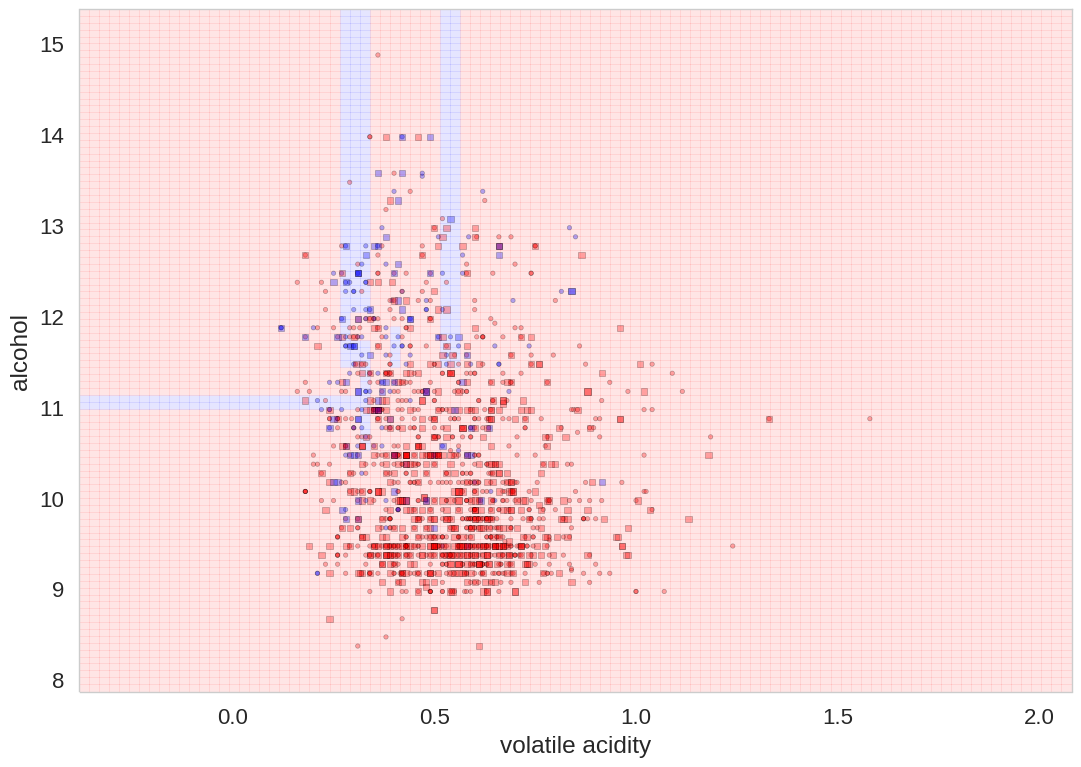

In [28]:
ax, _, _ = common_ds.points_plot(plt.gca(), Xtrain, Xtest, ytrain, ytest, clfTree3);
ax.set_xlabel('volatile acidity')
ax.set_ylabel('alcohol')

In [29]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = common_ds.do_classify(clfAda, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')



using mask
BEST {'n_estimators': 16} 0.392682933018
############# based on standard predict ################
Accuracy on training data: 0.88
Accuracy on test data:     0.89
[[529  26]
 [ 42  43]]
########################################################


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = common_ds.do_classify(clfGB, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'n_estimators': 54, 'max_depth': 5} 0.410758350882
############# based on standard predict ################
Accuracy on training data: 0.99
Accuracy on test data:     0.90
[[542  13]
 [ 48  37]]
########################################################


In [31]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()

imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]
imp_cols

array([9, 0])

In [32]:
imp_names = [Xnames[imp_cols[0]], Xnames[imp_cols[1]]]
imp_names

['alcohol', 'volatile acidity']

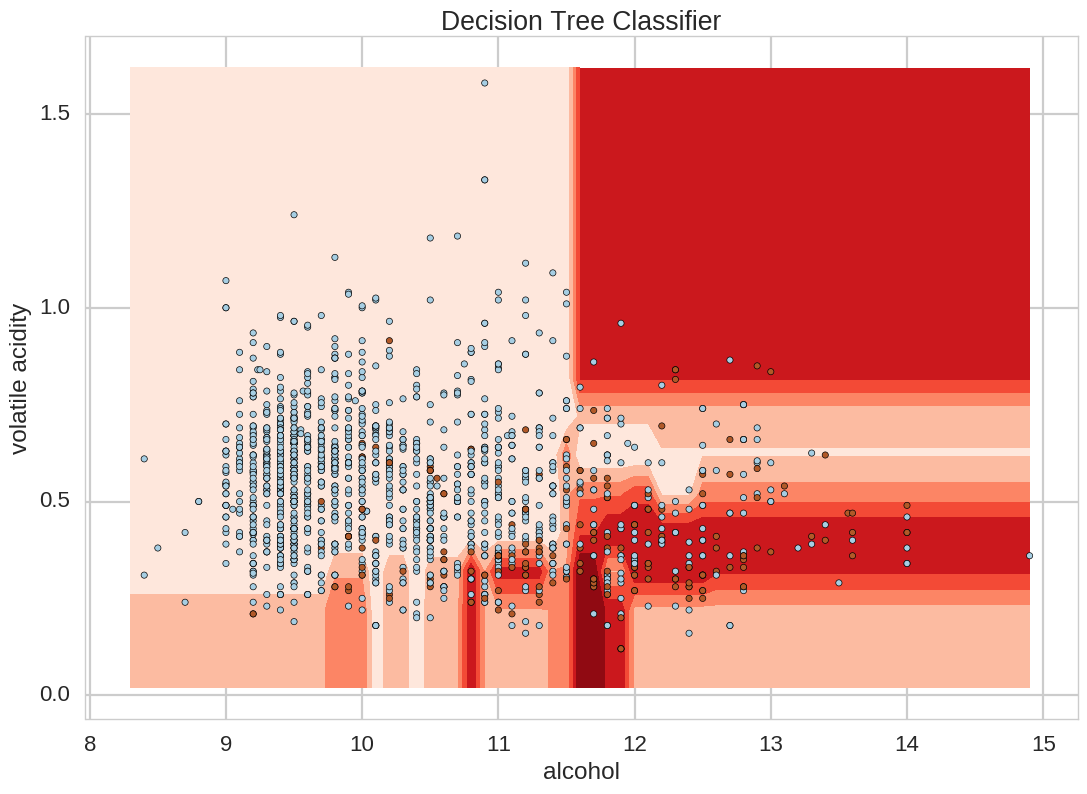

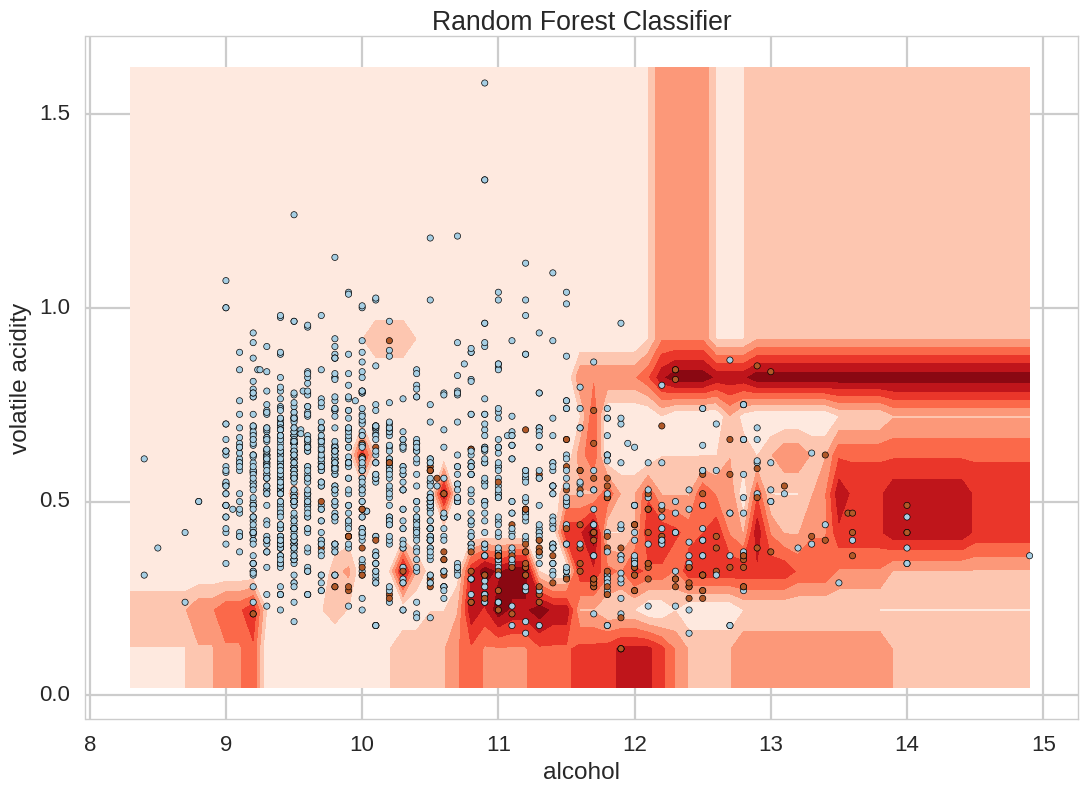

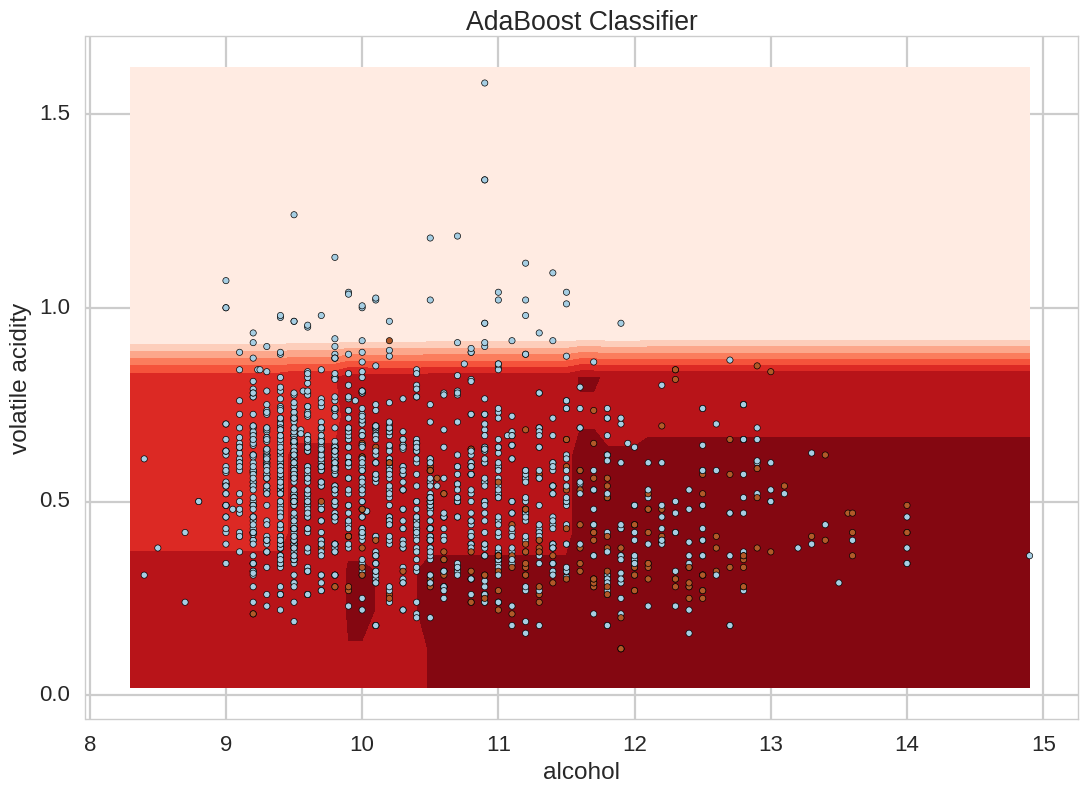

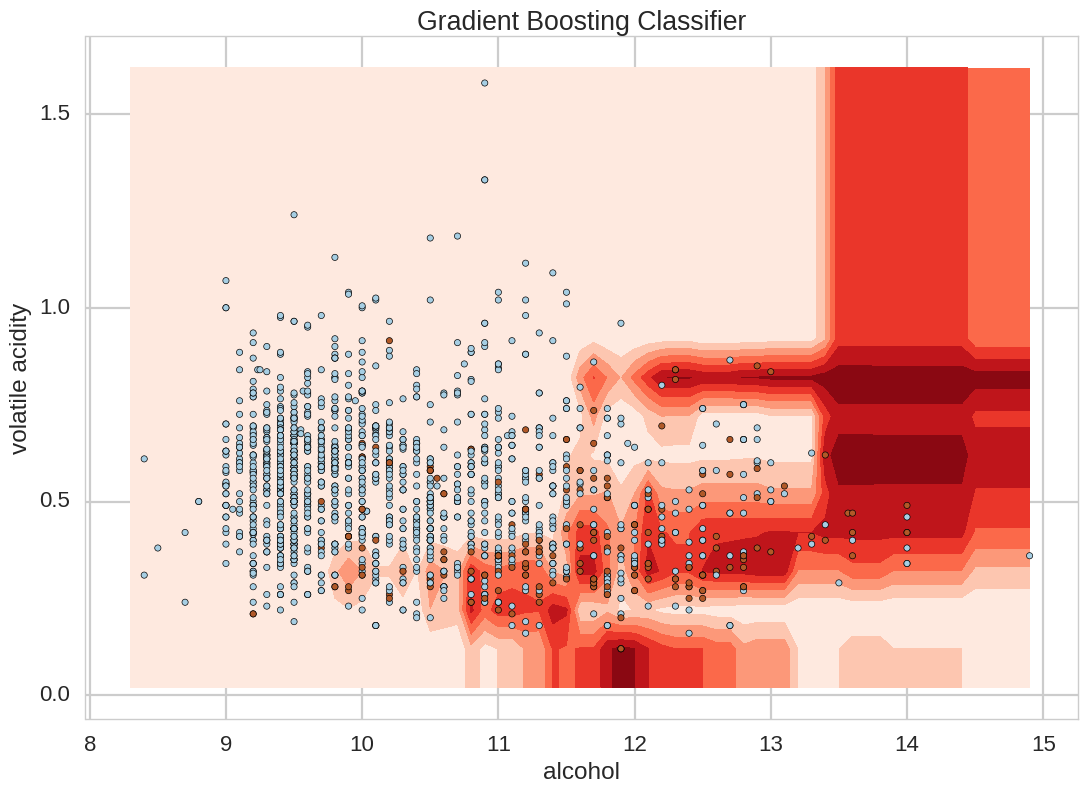

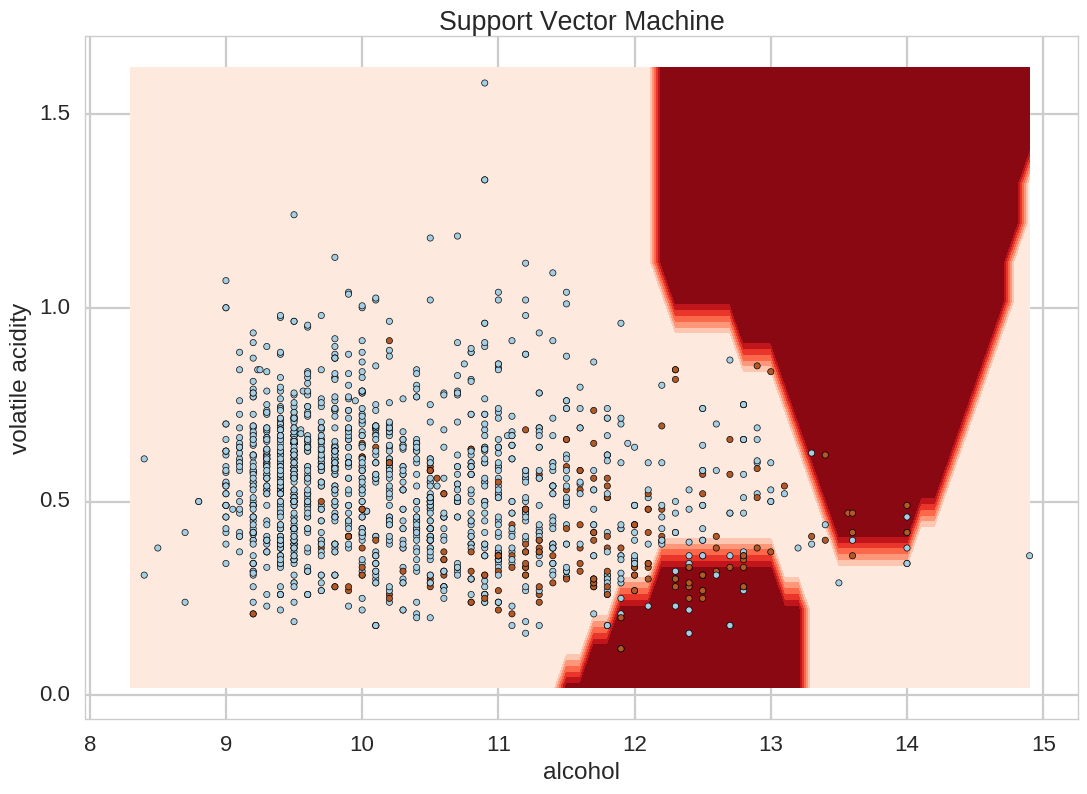

In [33]:
X_imp = df[imp_names].values
Y = df.target.values

clfSVC = sklearn.svm.SVC(C=100.0, gamma=1.0)

classifiers = [clfTree3,
               clfForest,
               clfAda,
               clfGB,
               clfSVC]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in xrange(5):
    plt.title(titleClassifer[c])
    plt.xlabel(imp_names[0])
    plt.ylabel(imp_names[1])
    plot_decision_surface(classifiers[c], X_imp, Y)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

# hard
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
common_ds.do_classify(eclf1, {}, df, Xnames, 'target', 1, mask=mask, n_jobs = 4, score_func='f1');

using mask
############# based on standard predict ################
Accuracy on training data: 0.93
Accuracy on test data:     0.90
[[541  14]
 [ 53  32]]
########################################################


In [35]:
# soft
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
common_ds.do_classify(eclf2, {}, df, Xnames, 'target', 1, mask=mask, n_jobs = 4, score_func='f1');

using mask
############# based on standard predict ################
Accuracy on training data: 0.93
Accuracy on test data:     0.90
[[537  18]
 [ 45  40]]
########################################################


In [36]:
# weights
eclf3 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1,2,1])
common_ds.do_classify(eclf3, {}, df, Xnames, 'target', 1, mask=mask, n_jobs = 4, score_func='f1');

using mask
############# based on standard predict ################
Accuracy on training data: 0.97
Accuracy on test data:     0.90
[[538  17]
 [ 48  37]]
########################################################


In [37]:
# gridsearch
eclf4 = VotingClassifier(estimators=[('lr', clf1), 
                                     ('rf', clf2), 
                                     ('gnb', clf3)], voting='soft')
params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}
common_ds.do_classify(eclf4, params, df, Xnames, 'target', 1, mask=mask, n_jobs = 4, score_func='f1');

using mask
BEST {'rf__n_estimators': 200, 'lr__C': 100.0} 0.437119553521
############# based on standard predict ################
Accuracy on training data: 0.93
Accuracy on test data:     0.91
[[537  18]
 [ 42  43]]
########################################################


In [38]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
import numpy as np
import operator

class EnsembleClassifier1(BaseEstimator, ClassifierMixin):
    def __init__(self, clfs, weights=None):
        self.clfs = clfs
        self.weights = weights

    def fit(self, X, y):
        for clf in self.clfs:
            clf.fit(X, y)
        return self

    def predict(self, X):
        self.classes_ = np.asarray([clf.predict(X) for clf in self.clfs])
        if self.weights:
            avg = self.predict_proba(X)
            maj = np.apply_along_axis(lambda x: max(enumerate(x), key=operator.itemgetter(1))[0], axis=1, arr=avg)
        else:
            maj = np.asarray([np.argmax(np.bincount(self.classes_[:,c])) for c in range(self.classes_.shape[1])])

        return maj

    def predict_proba(self, X):
        self.probas_ = [clf.predict_proba(X) for clf in self.clfs]
        avg = np.average(self.probas_, axis=0, weights=self.weights)
        return avg

In [39]:
eclf5 = EnsembleClassifier1([clf1, clf2, clf3])
common_ds.do_classify(eclf5, {}, df, Xnames, 'target', 1, mask=mask, n_jobs = 4, score_func='f1');

using mask
############# based on standard predict ################
Accuracy on training data: 0.93
Accuracy on test data:     0.90
[[541  14]
 [ 53  32]]
########################################################


In [40]:
eclf6 = EnsembleClassifier1([clf1, clf2, clf3], weights=[1,2,1])
common_ds.do_classify(eclf6, {}, df, Xnames, 'target', 1, mask=mask, n_jobs = 4, score_func='f1');

using mask
############# based on standard predict ################
Accuracy on training data: 0.97
Accuracy on test data:     0.90
[[538  17]
 [ 48  37]]
########################################################


In [41]:
# Combiner model
from sklearn.linear_model import LogisticRegression

class EnsembleClassifier2(BaseEstimator, ClassifierMixin):
    def __init__(self, clfs):
        self.clfs = clfs
        self.combiner = LogisticRegression()

    def fit(self, X, y):
        for clf in self.clfs:
            clf.fit(X, y)
        submodel_predictions = {str(i): self.clfs[i].predict_proba(X)[:, 1]
                                for i in range(len(self.clfs))}
        predictions_df = pd.DataFrame(submodel_predictions)
        self.combiner.fit(predictions_df.values, y)
        return self

    def predict_proba(self, X):
        probas = {str(i): self.clfs[i].predict_proba(X)[:, 1] for i in range(len(self.clfs))}
        probas_df = pd.DataFrame(probas)
        return self.combiner.predict_proba(probas_df.values)

    def predict(self, X):
        probas = {str(i): self.clfs[i].predict_proba(X)[:, 1] for i in range(len(self.clfs))}
        probas_df = pd.DataFrame(probas)
        return self.combiner.predict(probas_df.values)
    
eclf7 = EnsembleClassifier2([clf1, clf2, clf3])
common_ds.do_classify(eclf7, {}, df, Xnames, 'target', 1, mask=mask, n_jobs = 4, score_func='f1');

using mask
############# based on standard predict ################
Accuracy on training data: 0.99
Accuracy on test data:     0.89
[[534  21]
 [ 48  37]]
########################################################


In [42]:
from sklearn.tree import DecisionTreeClassifier

class EnsembleClassifier3(BaseEstimator, ClassifierMixin):
    def __init__(self, clfs):
        self.clfs = clfs
        self.combiner = DecisionTreeClassifier(max_depth=3)

    def fit(self, X, y):
        for clf in self.clfs:
            clf.fit(X, y)
        submodel_predictions = {str(i): self.clfs[i].predict_proba(X)[:, 1]
                                for i in range(len(self.clfs))}
        predictions_df = pd.DataFrame(submodel_predictions)
        self.combiner.fit(predictions_df.values, y)
        return self

    def predict_proba(self, X):
        probas = {str(i): self.clfs[i].predict_proba(X)[:, 1] for i in range(len(self.clfs))}
        probas_df = pd.DataFrame(probas)
        return self.combiner.predict_proba(probas_df.values)

    def predict(self, X):
        probas = {str(i): self.clfs[i].predict_proba(X)[:, 1] for i in range(len(self.clfs))}
        probas_df = pd.DataFrame(probas)
        return self.combiner.predict(probas_df.values)
    
eclf8 = EnsembleClassifier3([clf1, clf2, clf3])
common_ds.do_classify(eclf8, {}, df, Xnames, 'target', 1, mask=mask, n_jobs = 4, score_func='f1');

using mask
############# based on standard predict ################
Accuracy on training data: 1.00
Accuracy on test data:     0.88
[[530  25]
 [ 50  35]]
########################################################


In [43]:
eclf8.combiner

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [44]:
export_graphviz(eclf8.combiner, 'combiner.dot', feature_names=['LogisticRegression', 'RandomForestClassifier', 'GaussianNB'])

In [45]:
!dot -Tpng combiner.dot -o combiner_example.png

![](combiner_example.png)

### Время практики. [Пошли топить титаник!](https://www.kaggle.com/c/titanic/data)

### Домашнее задание.

Попытайтесь улучшить результат вашего классификатора, построенного на одном из предыдущих ДЗ
использовав методы комбинирования моделей описанных сегодня.

In [50]:
titanic_df = pd.read_csv('train.csv')

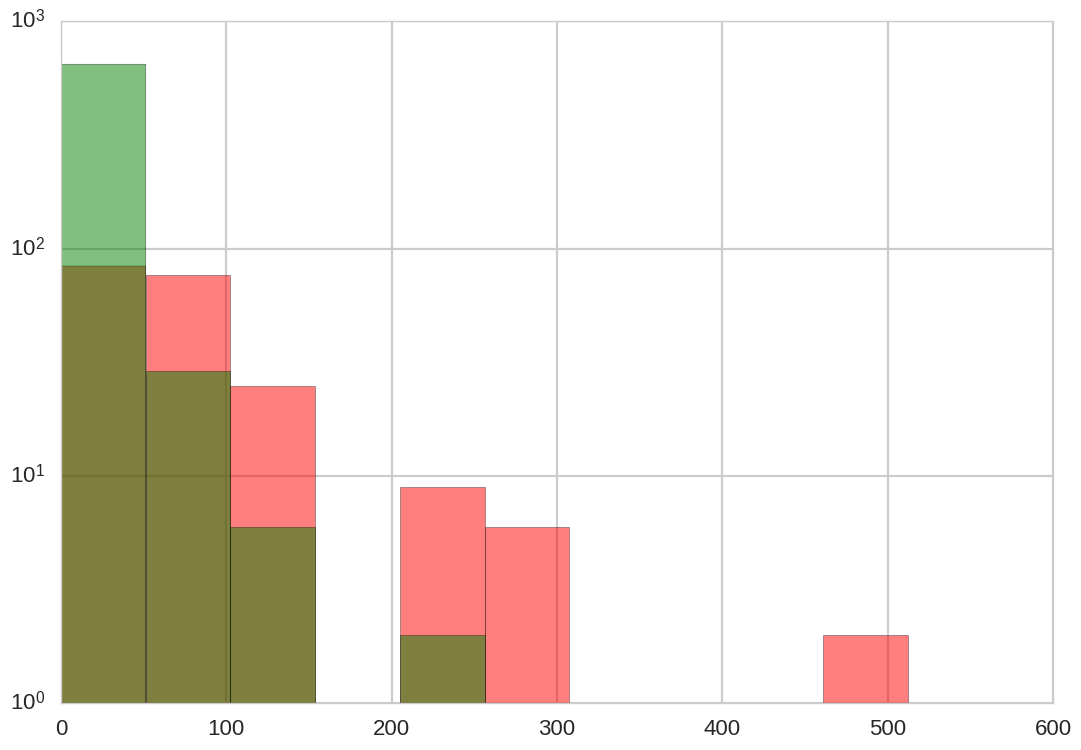

In [67]:
titanic_df[titanic_df.Cabin.notnull()].Fare.hist(color="red", alpha=0.5)
titanic_df[titanic_df.Cabin.isnull()].Fare.hist(color="green", alpha=0.5)
ax = plt.gca()
ax.set_yscale("log")

In [87]:
# titanic_df['has_cabin'] = titanic_df.Cabin.notnull()
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,False


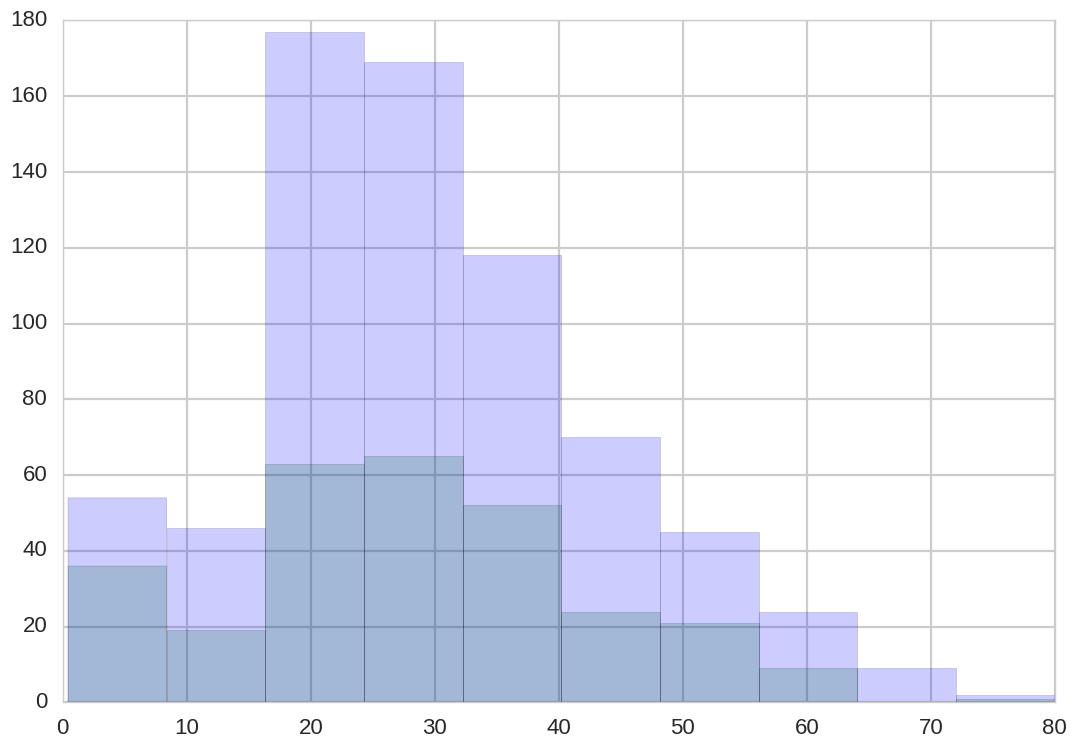

In [84]:
titanic_df[titanic_df.Survived == 1].Age.hist(alpha=0.2, color="green")
titanic_df.Age.hist(alpha=0.2, color="blue")